# Synthetic Data Generation ?

# Synthetic data generation involves creating artificial data that closely resembles real-world data while preserving its statistical properties and patterns. In the context of fraud detection in banking and finance, synthetic data generation can be a valuable tool for various purposes, including augmenting existing datasets, addressing data privacy concerns, and enhancing the robustness of fraud detection models. Here are some key details about synthetic data generation:

Techniques: Several techniques can be used for synthetic data generation, including:

Generative Adversarial Networks (GANs): GANs consist of two neural networks, a generator and a discriminator, which are trained adversarially to generate realistic data samples. GANs have been successfully applied to various domains, including generating synthetic images, text, and tabular data.
Variational Autoencoders (VAEs): VAEs are another type of generative model that learns to encode and decode data samples. By sampling from the learned latent space, VAEs can generate new data samples that closely resemble the training data.
Markov Chain Monte Carlo (MCMC) methods: MCMC methods involve sampling from a probability distribution to generate synthetic data samples that approximate the true data distribution. These methods can be particularly useful for generating synthetic time series data or sequences.
Rule-based approaches: Rule-based approaches involve defining explicit rules or constraints to generate synthetic data that adheres to specific patterns or properties observed in the real data.
Data Privacy: Synthetic data generation can help address privacy concerns associated with using real-world data, especially in highly regulated industries such as banking and finance. By generating synthetic data that preserves the statistical properties of the original data while masking sensitive information, financial institutions can perform analyses and develop models without compromising data privacy or confidentiality.

Data Augmentation: Synthetic data generation can be used to augment existing datasets by creating additional samples that capture the diversity and complexity of real-world data. This can be particularly beneficial in scenarios where the available data is limited or imbalanced, such as in fraud detection where the number of fraudulent transactions may be relatively small compared to legitimate transactions.

Model Training and Evaluation: Synthetic data can be used for training and evaluating fraud detection models, providing a way to simulate various scenarios and test the model's performance under different conditions. By generating synthetic data that covers a wide range of potential fraud patterns and behaviors, financial institutions can improve the robustness and generalization of their fraud detection systems.

Challenges and Considerations: Despite its benefits, synthetic data generation also poses several challenges and considerations, including:

Ensuring that the synthetic data accurately captures the underlying patterns and characteristics of the real data.
Balancing the trade-off between data privacy and utility, especially when generating synthetic data from sensitive or proprietary datasets.
Evaluating the quality and validity of the synthetic data to ensure that it remains useful for its intended purposes.
Adapting synthetic data generation techniques to specific use cases and domain-specific requirements, such as regulatory compliance and business objectives.
Overall, synthetic data generation offers a powerful approach to address various challenges in fraud detection and other applications in banking and finance, providing a way to generate diverse, realistic, and privacy-preserving data for analysis and model development.





In [ ]:
Create Few variables like transaction_amount, zip_code, merchant_name, count_of_last_30_days_transactions,
count_of_last_60_days_transactions, , amount_of_last_15_days_transactions, , amount_of_last_30_days_transactions,
last_phone_change_date, last_address_change_date, etc. use variables like this.  Create more variables like this.

In [ ]:
Generative Adversarial Networks (GANs) can be utilized to generate synthetic data for the given use
case involving variables such as transaction_amount, zip_code, merchant_name, count_of_last_30_days_transactions,
count_of_last_60_days_transactions, amount_of_last_15_days_transactions, amount_of_last_30_days_transactions,
last_phone_change_date, last_address_change_date, and more. Below is a Python code example demonstrating
how to generate synthetic data using GANs:

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Define the dimensions of the input noise vector
latent_dim = 100

# Define the number of features (variables) in the synthetic data
num_features = 10

# Define the generator model
def define_generator(latent_dim, num_features):
    init = RandomNormal(stddev=0.02)
    in_layer = Input(shape=(latent_dim,))
    n_nodes = 128
    gen = Dense(n_nodes, kernel_initializer=init)(in_layer)
    gen = LeakyReLU(alpha=0.2)(gen)
    out_layer = Dense(num_features, activation='linear', kernel_initializer=init)(gen)
    model = Model(in_layer, out_layer)
    return model

# Define the discriminator model
def define_discriminator(num_features):
    init = RandomNormal(stddev=0.02)
    in_layer = Input(shape=(num_features,))
    n_nodes = 128
    dis = Dense(n_nodes, kernel_initializer=init)(in_layer)
    dis = LeakyReLU(alpha=0.2)(dis)
    out_layer = Dense(1, activation='sigmoid', kernel_initializer=init)(dis)
    model = Model(in_layer, out_layer)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Define the GAN model, combining the generator and discriminator
def define_gan(generator, discriminator):
    discriminator.trainable = False
    gan_output = discriminator(generator.output)
    model = Model(generator.input, gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# Generate real samples with random values for demonstration
def generate_real_samples(num_samples, num_features):
    X = np.random.rand(num_samples, num_features) * 1000  # Random values for demonstration
    return X

# Generate noise as input for the generator
def generate_latent_points(latent_dim, num_samples):
    x_input = np.random.randn(latent_dim * num_samples)
    x_input = x_input.reshape(num_samples, latent_dim)
    return x_input

# Generate fake samples using the generator
def generate_fake_samples(generator, latent_dim, num_samples):
    x_input = generate_latent_points(latent_dim, num_samples)
    X = generator.predict(x_input)
    return X

# Train the GAN model
def train_gan(generator, discriminator, gan_model, latent_dim, num_epochs=1000, batch_size=128):
    for epoch in range(num_epochs):
        # Generate real samples
        X_real = generate_real_samples(batch_size, num_features)
        y_real = np.ones((batch_size, 1))  # Label real samples as 1
        # Train discriminator on real samples
        discriminator_loss_real = discriminator.train_on_batch(X_real, y_real)

        # Generate fake samples
        X_fake = generate_fake_samples(generator, latent_dim, batch_size)
        y_fake = np.zeros((batch_size, 1))  # Label fake samples as 0
        # Train discriminator on fake samples
        discriminator_loss_fake = discriminator.train_on_batch(X_fake, y_fake)

        # Generate noise as input for the generator
        X_gan = generate_latent_points(latent_dim, batch_size)
        y_gan = np.ones((batch_size, 1))  # Lie to the discriminator and label generated samples as real (1)
        # Train the generator via the GAN model
        gan_loss = gan_model.train_on_batch(X_gan, y_gan)

        # Print progress
        print(f'Epoch: {epoch+1}, Discriminator Loss Real: {discriminator_loss_real[0]}, Discriminator Loss Fake: {discriminator_loss_fake[0]}, Generator Loss: {gan_loss}')

# Train the GAN model
train_gan(generator, discriminator, gan_model, latent_dim)



# Define scaler to normalize data
scaler = MinMaxScaler()

# Define the generator, discriminator, and GAN models
generator = define_generator(latent_dim, num_features)
discriminator = define_discriminator(num_features)
gan_model = define_gan(generator, discriminator)

# Train the GAN model
train_gan(generator, discriminator, gan_model, latent_dim)


4/4 [==============================] - 0s 3ms/step
Epoch: 1, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.007311123423278332, Generator Loss: 4.924345970153809
4/4 [==============================] - 0s 3ms/step
Epoch: 2, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.007282956037670374, Generator Loss: 4.927596092224121
4/4 [==============================] - 0s 3ms/step
Epoch: 3, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.007261862047016621, Generator Loss: 4.931838035583496
4/4 [==============================] - 0s 4ms/step
Epoch: 4, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.00725750345736742, Generator Loss: 4.932462692260742
4/4 [==============================] - 0s 3ms/step
Epoch: 5, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.00723156938329339, Generator Loss: 4.935441970825195
4/4 [==============================] - 0s 3ms/step
Epoch: 6, Discriminator Loss Real: 0.0, Discriminator Loss Fake: 0.0072142137214541435, Gen

In [13]:
# Convert real and synthetic data to DataFrame
real_df = pd.DataFrame(real_data)
synthetic_df = pd.DataFrame(synthetic_data)

# Print the real and synthetic data
print("Real Data:")
print(real_df.head())

print("\nSynthetic Data:")
print(synthetic_df.head())


Real Data:
            0           1           2           3           4           5  \
0  197.485562  941.754297  405.363251  350.628510  397.287033  488.361427   
1  858.223389  399.935832  375.834600  413.328243   70.908116   32.974004   
2  757.845836  510.890979  291.479274  398.046837  180.310745  342.903229   
3  250.059387  245.022945  615.048871  698.921042  202.649178  560.534046   
4  554.050486  200.265260  279.359820  796.966225  945.397741  242.247938   

            6           7           8           9  
0  676.942356  371.765745  183.008299   60.875294  
1  511.717511  120.662252  229.579578    7.208655  
2  963.885792  400.737964  974.482785  483.867759  
3    4.224480  725.171381  824.316706   23.819660  
4  341.144271  989.703629  187.158476  988.611105  

Synthetic Data:
          0         1         2          3         4         5         6  \
0 -0.424621  1.213571  0.110112  -2.727081  0.792944  0.358808  1.302016   
1 -0.336435  0.091355  0.258461   0.427403  0

In [14]:
# Define the generator, discriminator, and GAN models
generator = define_generator(latent_dim, num_features)
discriminator = define_discriminator(num_features)
gan_model = define_gan(generator, discriminator)

# Train the GAN model and get real and synthetic data samples
real_data, synthetic_data = train_gan(generator, discriminator, gan_model, latent_dim)

# Convert real and synthetic data to DataFrame
real_df = pd.DataFrame(real_data, columns=[f"Feature_{i+1}" for i in range(num_features)])
synthetic_df = pd.DataFrame(synthetic_data, columns=[f"Feature_{i+1}" for i in range(num_features)])

# Print the real and synthetic data
print("Real Data:")
print(real_df.head())

print("\nSynthetic Data:")
print(synthetic_df.head())

C:\Users\pixel\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
C:\Users\pixel\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step
Epoch: 1, Discriminator Loss Real: 0.04760207235813141, Discriminator Loss Fake: 0.6932083964347839, Generator Loss: 0.6932094097137451
2/2 [==============================] - 0s 4ms/step
Epoch: 2, Discriminator Loss Real: 0.009133855812251568, Discriminator Loss Fake: 0.6930009126663208, Generator Loss: 0.6934955716133118
2/2 [==============================] - 0s 4ms/step
Epoch: 3, Discriminator Loss Real: 0.0010708036134019494, Discriminator Loss Fake: 0.692727267742157, Generator Loss: 0.6937493085861206
2/2 [==============================] - 0s 4ms/step
Epoch: 4, Discriminator Loss Real: 0.0022664866410195827, Discriminator Loss Fake: 0.692411482334137, Generator Loss: 0.6939769983291626
2/2 [==============================] - 0s 4ms/step
Epoch: 5, Discriminator Loss Real: 0.001869898522272706, Discriminator Loss Fake: 0.6922485828399658, Generator Loss: 0.6943042874336243
2/2 [==============================] - 0s 4ms/step
Epoch: 6, 

ValueError: num must be an integer with 1 <= num <= 6, not 7

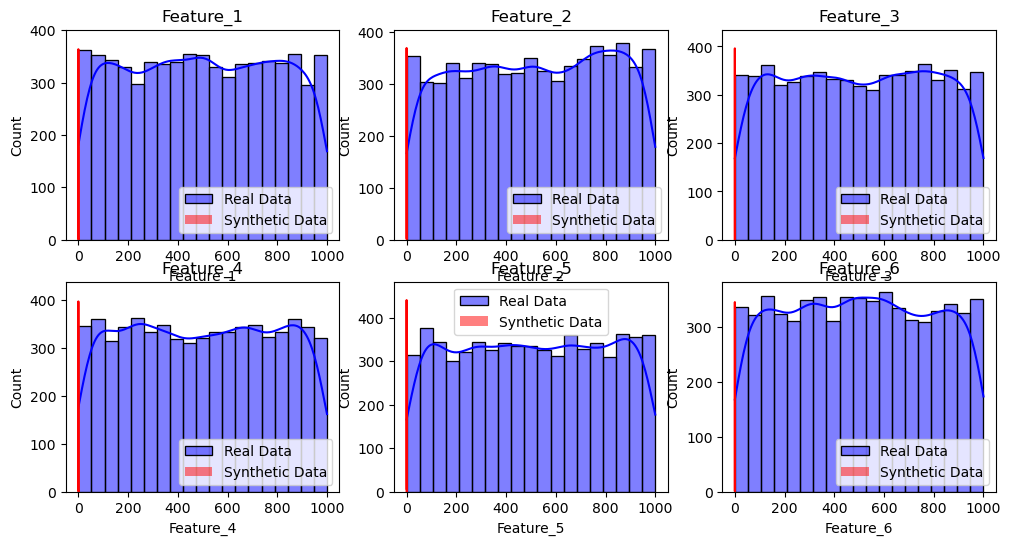

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate summary statistics for each variable
real_stats = real_df.describe()
synthetic_stats = synthetic_df.describe()

column_names = ['Feature_1',   'Feature_2',   'Feature_3',   'Feature_4',   'Feature_5' ,  'Feature_6', 
               'Feature_7' ,  'Feature_8' ,  'Feature_9' , 'Feature_10'  ]
# Plot histograms for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(column_names):
    plt.subplot(2, 3, i + 1)
    sns.histplot(real_df[col], color='blue', kde=True, label='Real Data', alpha=0.5)
    sns.histplot(synthetic_df[col], color='red', kde=True, label='Synthetic Data', alpha=0.5)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

# Plot KDE plots for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(column_names):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(real_df[col], color='blue', label='Real Data')
    sns.kdeplot(synthetic_df[col], color='red', label='Synthetic Data')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

# Plot Q-Q plots for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(column_names):
    plt.subplot(2, 3, i + 1)
    stats.probplot(real_df[col], dist="norm", plot=plt)
    stats.probplot(synthetic_df[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot box plots for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(column_names):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=pd.concat([real_df[col], synthetic_df[col]], axis=1), orient="h")
    plt.title(col)
plt.tight_layout()
plt.show()


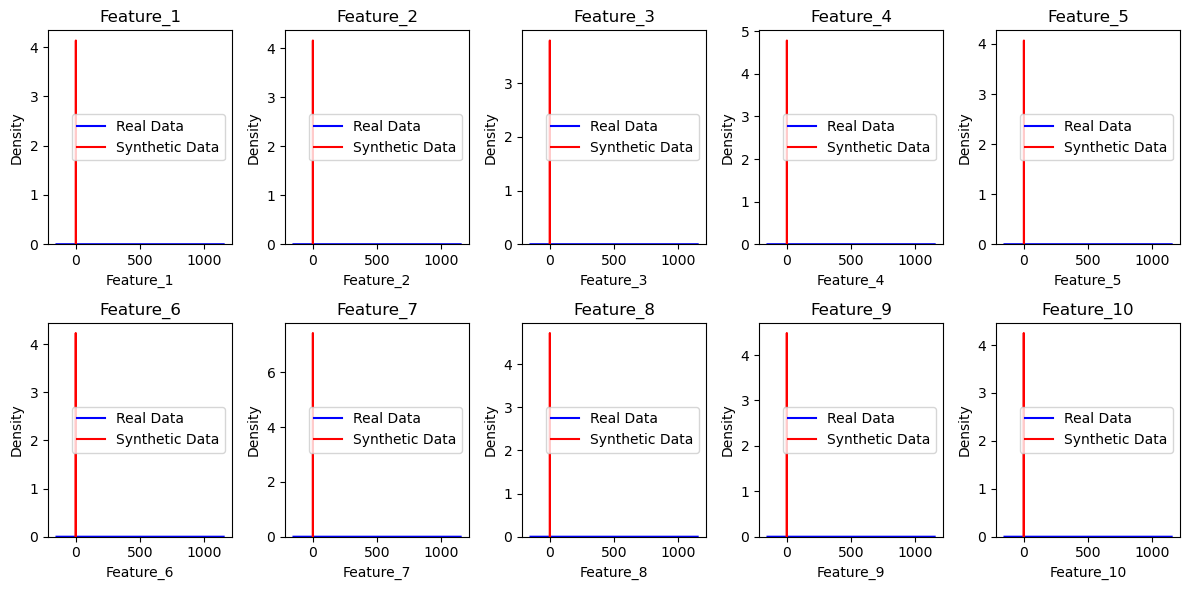

In [19]:
# Plot KDE plots for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(column_names):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(real_df[col], color='blue', label='Real Data')
    sns.kdeplot(synthetic_df[col], color='red', label='Synthetic Data')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# Train the GAN model and return real and synthetic data
def train_gan(generator, discriminator, gan_model, latent_dim, num_epochs=100, batch_size=128):
    real_data = []
    synthetic_data = []
    for epoch in range(num_epochs):
        # Generate real samples
        X_real = generate_real_samples(batch_size // 2, num_features)  # Adjust batch size here
        y_real = np.ones((batch_size // 2, 1))  # Label real samples as 1
        # Train discriminator on real samples
        discriminator_loss_real = discriminator.train_on_batch(X_real, y_real)

        # Generate fake samples
        X_fake = generate_fake_samples(generator, latent_dim, batch_size // 2)  # Adjust batch size here
        y_fake = np.zeros((batch_size // 2, 1))  # Label fake samples as 0
        # Train discriminator on fake samples
        discriminator_loss_fake = discriminator.train_on_batch(X_fake, y_fake)

        # Generate noise as input for the generator
        X_gan = generate_latent_points(latent_dim, batch_size)
        y_gan = np.ones((batch_size, 1))  # Lie to the discriminator and label generated samples as real (1)
        # Train the generator via the GAN model
        gan_loss = gan_model.train_on_batch(X_gan, y_gan)

        # Store real and synthetic data samples
        real_data.append(X_real)
        synthetic_data.append(X_fake)

        # Print progress
        print(f'Epoch: {epoch+1}, Discriminator Loss Real: {discriminator_loss_real[0]}, Discriminator Loss Fake: {discriminator_loss_fake[0]}, Generator Loss: {gan_loss}')
    
    return np.vstack(real_data), np.vstack(synthetic_data)

# Train the GAN model and get real and synthetic data samples
real_data, synthetic_data = train_gan(generator, discriminator, gan_model, latent_dim)

# Print the shapes of real and synthetic data
print("Real Data Shape:", real_data.shape)
print("Synthetic Data Shape:", synthetic_data.shape)


2/2 [==============================] - 0s 4ms/step
Epoch: 1, Discriminator Loss Real: 6.112843948358204e-06, Discriminator Loss Fake: 0.0663091391324997, Generator Loss: 2.746642827987671
2/2 [==============================] - 0s 3ms/step
Epoch: 2, Discriminator Loss Real: 1.1268658006713395e-08, Discriminator Loss Fake: 0.06790364533662796, Generator Loss: 2.7484090328216553
2/2 [==============================] - 0s 4ms/step
Epoch: 3, Discriminator Loss Real: 0.0004337732389103621, Discriminator Loss Fake: 0.0670987069606781, Generator Loss: 2.7551774978637695
2/2 [==============================] - 0s 3ms/step
Epoch: 4, Discriminator Loss Real: 3.303157924960942e-08, Discriminator Loss Fake: 0.06632214039564133, Generator Loss: 2.7470877170562744
2/2 [==============================] - 0s 5ms/step
Epoch: 5, Discriminator Loss Real: 3.527104652789603e-08, Discriminator Loss Fake: 0.06721106171607971, Generator Loss: 2.751619815826416
2/2 [==============================] - 0s 3ms/step
Ep

In [11]:
import pandas as pd

# Define column names
column_names = ['transaction_amount', 'zip_code', 'merchant_name', 'count_of_last_30_days_transactions', 'count_of_last_60_days_transactions']

# Convert real and synthetic data to DataFrame
real_df = pd.DataFrame(real_data, columns=column_names)
synthetic_df = pd.DataFrame(synthetic_data, columns=column_names)

# Print the real and synthetic data
print("Real Data:")
print(real_df.head())

print("\nSynthetic Data:")
print(synthetic_df.head())


array([[197.48556214, 941.75429656, 405.36325142, ..., 371.76574463,
        183.0082987 ,  60.87529387],
       [858.22338948, 399.93583177, 375.83459953, ..., 120.66225202,
        229.57957777,   7.20865457],
       [757.84583602, 510.89097892, 291.47927414, ..., 400.73796444,
        974.48278502, 483.86775858],
       ...,
       [412.38789698, 989.79686121,  38.42772996, ..., 420.85461009,
        752.43604217, 704.20605194],
       [495.60992741, 800.49834912, 249.26357874, ..., 380.0252939 ,
        915.86917468, 572.96862131],
       [231.255913  , 461.14959623, 341.21384348, ..., 866.22828863,
        111.43551904, 424.41932057]])

In [ ]:
# Train the GAN model
def train_gan(generator, discriminator, gan_model, latent_dim, num_epochs=10000, batch_size=128):
    for epoch in range(num_epochs):
        # Generate real samples
        X_real = generate_real_samples(batch_size // 2, num_features)  # Adjust batch size here
        # Generate fake samples
        X_fake = generate_fake_samples(generator, latent_dim, batch_size // 2)  # Adjust batch size here
        # Concatenate real and fake samples
        X_combined = np.vstack((X_real, X_fake))
        y_combined = np.hstack((np.ones((batch_size // 2, 1)), np.zeros((batch_size // 2, 1))))  # Adjust labels accordingly
        # Train discriminator
        discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
        # Generate noise as input for the generator
        X_gan = generate_latent_points(latent_dim, batch_size)
        y_gan = np.ones((batch_size, 1))
        # Train generator
        gan_loss = gan_model.train_on_batch(X_gan, y_gan)
        # Print progress
        print(f'Epoch: {epoch+1}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {gan_loss}')

# Train the GAN model
train_gan(generator, discriminator, gan_model, latent_dim)
